# Conceptual Test

purpose: classify PSK and GFSK signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
from lib import sig_gen

Loading BokehJS ...

In [30]:
def upsample(x, sps, zeros=True):
    zo = np.zeros((x.size, sps), dtype=x.dtype)
    if zeros:
        zo[:, 0] += x
    else:
        zo += np.expand_dims(x, 1)
    return zo.flatten()

def gaussdesign(bt, sps):
    filtLen = sps*4
    t = np.linspace(-0.5, 0.5, filtLen)
    alpha = np.sqrt(np.log(2)/2) / (bt)
    h = (np.sqrt(np.pi)/alpha) * np.exp(-(t*np.pi/alpha)**2)
    h = h/h.sum()
    return h

def rcdesign(sps):
    sps = sps*2
    t = np.arange(sps)
    g = (1-np.cos(2*np.pi*t/(sps)))/sps
    return g[1::2]*2



symb, sps, mi = 10, 10, 0.5

msg = np.array([0,1,0])
msg = msg*2-1.0
freq = upsample(msg, sps)


# shape = np.ones(sps)/sps

bt, span = 0.8, 1
shape = gaussdesign(bt, sps)
# shape = rcdesign(sps)
# plt.plot(shape)

print(shape.sum())
freq = np.convolve(freq, shape)

phase = np.zeros_like(freq)
for idx in range(freq.size-1):
    phase[idx+1] = phase[idx] + mi*np.pi*freq[idx]

    
fig0 = figure(plot_width=600, plot_height=300)
fig0.line(np.arange(shape.size), shape)
show(fig0)    
    
# fig = figure(plot_width=600, plot_height=300)
# fig.line(np.arange(phase.size), phase/np.pi)
# show(fig)

sig = np.exp(1j*phase)
fq = np.diff(np.unwrap(np.angle(sig))) 
fig2 = figure(plot_width=600, plot_height=300)
fig2.line(np.arange(fq.size), fq)
show(fig2)


1.0


In [6]:
shape.sum()

1.0

In [17]:
def gaussdesign(bt, sps):
    filtLen = sps
    t = np.linspace(-0.5, 0.5, filtLen)
    alpha = np.sqrt(np.log(2)/2) / (bt)
    h = (np.sqrt(np.pi)/alpha) * np.exp(-(t*np.pi/alpha)**2)
    h = h/np.sum(h)
    return h

def rcdesign(sps):
    t = np.arange(sps)
    g = (1-np.cos(2*np.pi*t/sps))/2/sps
    return g

bt, span = 0.3, 4
gaus = gaussdesign(bt, 100)
# gaus = rcdesign(100)

fig = figure(plot_width=600, plot_height=300)
fig.line(np.arange(gaus.size), gaus)
show(fig)
gaus.sum()

1.0

In [3]:
bt, span, sps, mi = 0.5, 5, 100, 0.5
gaus = sig_gen.gaussdesign(bt, span, sps)
gaus = gaus[:-1]*sps
msg = np.random.randint(0, 2, 32)
msg = np.array([0,1,0,1,0,1,0,1,1, 1, 1])
freq = msg*2-1.0
freq = sig_gen.upsample(freq, sps)
freq_gaus = np.convolve(freq, gaus)

phase = np.zeros_like(freq_gaus)
for idx in range(freq_gaus.size-1):
    phase[idx+1] = phase[idx] + np.pi/sps*mi*freq_gaus[idx]
# sig = np.exp(1j*phase)
# return sig[int(sps*span/2):int(-sps*span/2)]

# fig1 = figure(plot_width=600, plot_height=300)
# fig1.line(np.arange(freq.size), freq)
# show(fig1)

fig2 = figure(plot_width=600, plot_height=300)
fig2.line(np.arange(gaus.size), gaus)
show(fig2)

freq_gaus = np.diff(phase)
fig4 = figure(plot_width=600, plot_height=300)
fig4.line(np.arange(freq_gaus.size), freq_gaus)
show(fig4)
# 

fig3 = figure(plot_width=600, plot_height=300)
fig3.line(np.arange(phase.size), phase/np.pi)
show(fig3)

In [4]:
gaus.shape

(500,)

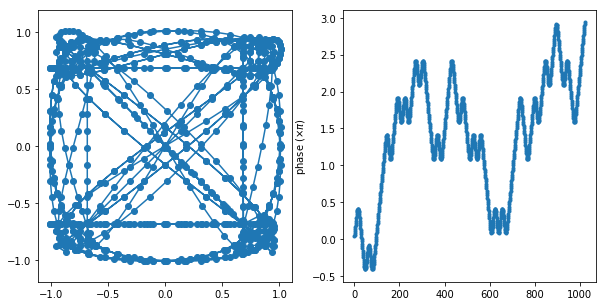

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sig = sig_gen.psk_gen()
ax[0].plot(sig.imag, sig.real, marker='o')
ax[0].axis('equal')

sig = sig_gen.gfsk_gen()
phase = np.unwrap(np.angle(sig))
ax[1].plot(phase/np.pi, marker='.')
plt.ylabel('phase ('r'$\times \pi$)')
plt.show()   

In [37]:
%timeit np.array([sig_gen.gfsk_gen() for x in range(10)])

4.59 ms ± 48.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
sig2 = np.vstack((sig, sig, sig))
sig2 = np.expand_dims(sig2, 1)[:, :, 0:-1: 4]

# sig2 = np.matlib.repmat(sig, 3, 1)
sig2.shape


(3, 1, 256)